# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
This is a classification problem. We want to predict a class (who is going to fail and who is going to pass), which is discrete. In regression we have to deal with continuous values (like house prices in the previous project)

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [2]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [5]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.columns[0:-1])

# TODO: Calculate passing students
n_passed = len(student_data[student_data.passed=='yes'])

# TODO: Calculate failing students
n_failed = n_students-n_passed

# TODO: Calculate graduation rate
grad_rate = float(n_passed)/float(n_students)*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Some extra data exploration

:0: FutureWarning: IPython widgets are experimental and may change in the future.
C:\Users\vecht499\Anaconda2\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


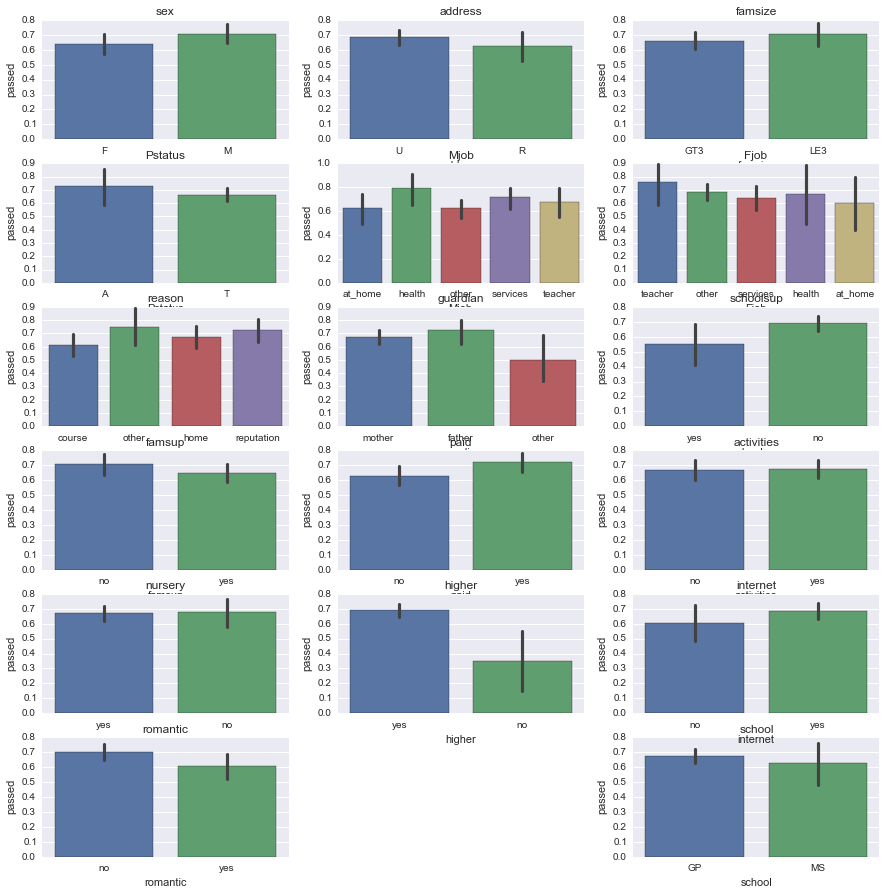

In [6]:
df=student_data.select_dtypes(include=['object']).copy()
df['passed']=df['passed'].apply(lambda x: 1 if x=='yes' else 0)

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(15, 15))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(6, 3, i)
    sns.barplot(x=col, y='passed', data=df)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('passed')

It looks like the fact that student wants to get higher education (variable higher) is the most important: percentage of students who passed is 2 times higher for students that want to get higher education.

Also having a romantic relationship, having school support seem to be important.

C:\Users\vecht499\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


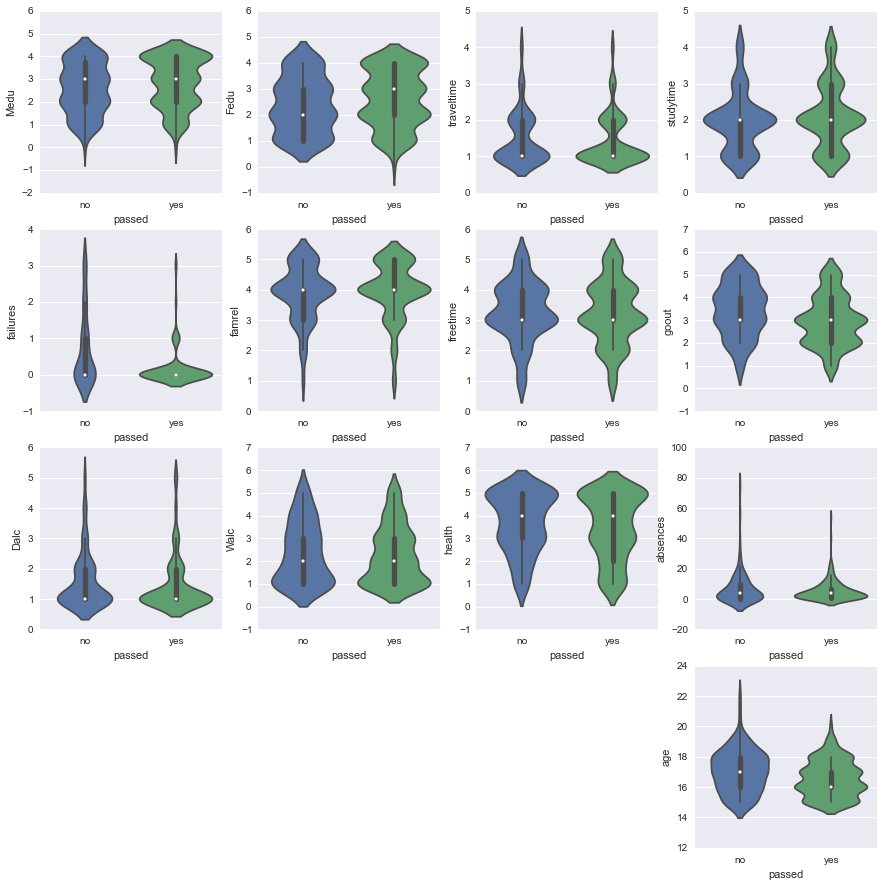

In [7]:
df1=student_data.select_dtypes(exclude=['object']).copy()
df1['passed']=student_data['passed']

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(15, 15))
for i, col in enumerate(df1.columns[:-1]):
    plt.subplot(4, 4, i)
    sns.violinplot(x='passed', y=col, data=df1)
    plt.xlabel('passed')
    plt.ylabel(col)

It looks like students that pass have a really different distribution of previous failures. The average amount of failures is significantly lover for students that passed. Distribution has a much thinner tail as well.

We can see some differences for amount of abscences as well.

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [6]:
X_all["passed"]=y_all

In [11]:
X_all.to_csv('C:/Projects/student_data.csv',index_label=False)

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [10]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=300,  random_state=8)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: **

We are dealinig with a classification problem (question one), and techniques such as logistic regression, random forest, support vector machines, Naive Bayes. KNN, Neural networks would be suitable here.

**While choosing a classification algorithm, we have to take into consideration the following factors:**

    1) How big is the dataset (number of records)

    2) How many features we have
    
    3) Is the data linearly separable

    4) How much time it would cost to train a model

    5) Is data balanced (# of observations in each class)

Our dataset is rather small (N = 395) and we do not have that many features (M=31, M is signigicanly smaller than N).
The data seems to be relatively separable (just by using graph we could already identify some variables which make a big difference) -> no need in SVM's with complicated kernels. The data is quite balanced (graduation rate of the class is 0.67%  - we do not have to deal with a rare event problem) -> no need to use oversampling techniques like SMOTE.

**I will start with Naive Bayes**. It is usually a good idea to start with a 'dirty' fast algorithm to see how it works. Naive Bayes is often mentioned as a high bias - low variance algorithm that works well on small dataset.  Advantage of Naive Bayes is that it is relatively fast. It explicitly calculates the parameters what costs less time than, for example, converging gradient descent in logistic regression. Also, it is easy to interpret. Disadvantage of Naive Bayes is that it ignores correlation between the features ('naive' hypothesis is that features are independent). General application of Naive Bayes is text analytics: it seems to work well for classifying spam/ham emails (e.g., Enron dataset) based on TF-IDF.

**I will continue with Logistic regression (LR)**. Is often seen as a general rule of thumb - algorithm to start with. It works pretty well for most of the problems and is widely used in clinical studies. Advantage of logistic regression is that it is easy to calculate marginal effects of different features and calculate the feature importance. Also, it is possible to apply different types of regularization (ridge, elastic net, lasso) to deal with overfitting problem. Main disadvantage of logistic regression is that it assumes linear dependency between explanotary variables and transformed respons in terams of log-odds ratio.

**I will finish with Random Forest**. Random forest is often the winner for lots of problems in classification. Main advantage of Random Forest is that it does not make assumptions about the data (which Naive Bayes and LR do make). Because of the way how Random Forest is constructed (random data samples with replacement, random features sample per each tree), it generates an internal unbiased estimate of the generalization error. Random forest can be easily parallelized. Disadvantage of Random Forest is that is it still more black-box algorithm than, for example, LR. It is hard  to find out what kind of contribution different features had while predicting the probability (though, it gives you some estimate of variable importance by using mean decrease in gini). Also, tends to overfit on noisy datasets (probably would work worse on small datasets than LR or Naive Bayes)

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [11]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [14]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
clf_A = MultinomialNB()
clf_B = LogisticRegression(random_state=8)
clf_C = RandomForestClassifier(random_state=0)

# TODO: Set up the training set sizes
X_train_100 = X_train[0:100]
y_train_100 = y_train[0:100]

X_train_200 = X_train[0:200]
y_train_200 = y_train[0:200]

X_train_300 = X_train[0:300]
y_train_300 = y_train[0:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
X_train_list=[X_train_100,X_train_200,X_train_300]
y_train_list=[y_train_100,y_train_200,y_train_300]
clf=[clf_A,clf_B,clf_C]

for i in range(len(clf)):
    for e in range(len(X_train_list)):
        train_predict(clf[i], X_train_list[e], y_train_list[e], X_test, y_test)

Training a MultinomialNB using a training set size of 100. . .
Trained model in 0.0030 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8645.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8000.
Training a MultinomialNB using a training set size of 200. . .
Trained model in 0.0030 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8339.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7943.
Training a MultinomialNB using a training set size of 300. . .
Trained model in 0.0000 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.8133.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7883.
Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.9290.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.7518.
Training a LogisticRegression using a training set size of 200.

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

###### ** Classifer 1 - Naive Bayes**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |  0.0000                 | 0.0000                 | 0.8645           | 0.8000          |
| 200               |  0.0100                 | 0.0000                 | 0.8339           | 0.7943          |
| 300               |  0.0000                 | 0.0010                 | 0.8133           | 0.7883          |

** Classifer 2 - Logistic regression**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |  0.0000                 | 0.0000                 | 0.9290           | 0.7518          |
| 200               |  0.0010                 | 0.0010                 | 0.8581           | 0.7407          |
| 300               |  0.0010                 | 0.0000                 | 0.8501           | 0.7910          |

** Classifer 3 - Random Forest**  

| Training Set Size | Prediction Time (train) | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |  0.0000                 | 0.0020                 | 0.9867           | 0.7347          |
| 200               |  0.0030                 | 0.0000                 | 0.9963           | 0.7704          |
| 300               |  0.0000                 | 0.0000                 | 0.9951           | 0.7969          |


In [15]:
from sklearn.metrics import classification_report
for clf in [clf_A, clf_B, clf_C]:
    print '\nReport for {}:\n'.format(clf.__class__.__name__)
    print classification_report(y_test, clf.predict(X_test))
    print '-'*52


Report for MultinomialNB:

             precision    recall  f1-score   support

         no       0.67      0.34      0.45        35
        yes       0.70      0.90      0.79        60

avg / total       0.69      0.69      0.66        95

----------------------------------------------------

Report for LogisticRegression:

             precision    recall  f1-score   support

         no       0.67      0.40      0.50        35
        yes       0.72      0.88      0.79        60

avg / total       0.70      0.71      0.68        95

----------------------------------------------------

Report for RandomForestClassifier:

             precision    recall  f1-score   support

         no       0.67      0.51      0.58        35
        yes       0.75      0.85      0.80        60

avg / total       0.72      0.73      0.72        95

----------------------------------------------------


## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

F1 score is a harmonic mean between precision and recall (see picture in de next block), which has some disadvantages as a measure. The most important disadvantages is that it gives equal cost to misclassification (false negatives and false positives are equally weighted). It can be a valid idea in some cases, but in case of student intervention false negatives may weight more than flase positives. So you would probably want to optimize some utility function that takes the weights into account.

Let's assume that false negatives and false positives are equally weighted (since we use F1 measure to compare the models). In that case I would advise to use Random Forest model. It costs a bit more time to train (difference is not significant on this dataset), but model has the highest F-score on the test set. Also, we see that performance of the model becomes better with bigger training size (unlike Naive Bayes). If we are planning to add more data in the future, it is important.

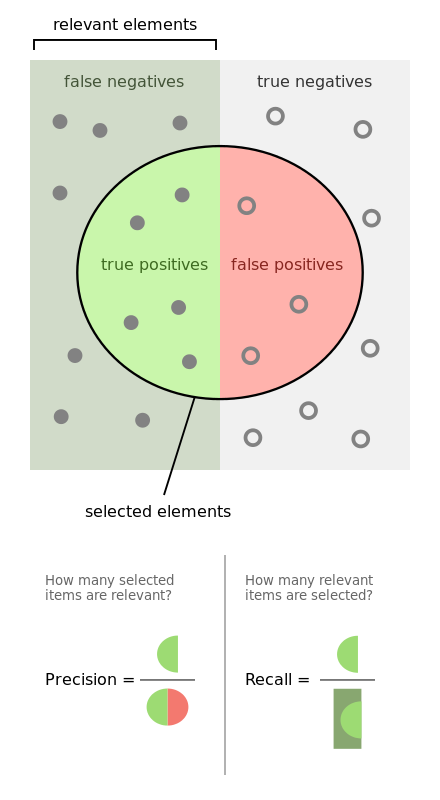

In [121]:
from IPython.display import Image
Image(filename='Precisionrecall.svg.png')

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **

A single decision tree model uses "features" we have about previous students who already passed or failed (eg, age, sex, parental situation, etc) to essentially create a flowchart that can give a prediction for whether a new student will pass or fail.

A Random Forest is a combination of such trees. To build one tree a sample is randomly selected from the dataset (sample with replacement - if N=100, we will every time pick 100 random students from the list). Also, M "features" are randomly selected (for example, if M=3 one tree uses sex, age, school, another tree uses parental situation, romantic relationship, interest in further eductation etc).

Let's consider a simple example. Let's say we have a random forest of 100 trees, each sample has 100 datapoints, 2 features are randomly selected.

Let's consider one tree from the 100 (see under). We have learned from the information we knew abobut the students that 67 out of these 100 students will graduate (so overal chance of graduation is 67%). If we look at other information about the student, we can become more or less sure about his/her chance of graduation. First we look whether student is planning to get higher education after school. If the answer is yes, then the chance of graduation is 80%. Otherwise it is 47,5%. Suppose we know that a person is planning to get higher education after school. Let's check whether student has a romantic relationship. If he/she has a romantic relationship, the chance of graduation is 65%, otherwise 87,5%.

Let's say we got a new student Wim. What we know about him is that we know wants to have higher education, is 19 years old, has romantic relationship. Having learned from the data we had, we know that person who wants to get higher education and has a romantic relationship has 65% chance of graduating. So we conclude that Wim will likely graduate as well.

There are  more  trees (99 in our example) that use different "features". Follwoing the logics of these trees we will conclude that Wim will either graduate or not. Let's say that Wim will graduate according to 60 trees and will fail according to 40 trees. The majority decides, so we will conclude that Wim will graduate.


           Passed (N=100)
             67 passed
               (67%)
                 |
                 |
               higher
       /                  \
.......yes (N=60)..................no (N=40).....
  
.......48 passed...................19 passed.....

.........(80%)........................(47,5%).....

          |
          |
       romantic
....../..........................\ .......
   
 yes (N=20).................no (N=40)
 
 13 passed..................35 passed
 
 ...(65%).....................(87,5%)
 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [17]:
def f1_scorer_func(y_true, y_pred):
    score=f1_score(y_true, y_pred, pos_label='yes')
    return score

In [18]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import  make_scorer

# TODO: Create the parameters list you wish to tune
parameters ={'max_features':range(4,12),'n_estimators':[20,30,40,50,60,70,80,90,100,110,120,130,140,150]}

# TODO: Initialize the classifier
clf =RandomForestClassifier(random_state=0)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_scorer_func)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer,cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Made predictions in 0.0100 seconds.
Tuned model has a training F1 score of 1.0000.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.8369.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

F1 score of tuned model is 1.0 for training and 0.8369 for testing (what is better than results for untuned model).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.